In [1]:
# Implementation of Histogram Equalization on a 8-bit gray scale image

# Platform: Python 3

In [2]:
# Histogram equalization is an image processing operation of contrast adjustment
# that distributes pixel intensities of the gray level to cover the whole dynamic range
# This allows for lower contrast areas to gain a higher contrast.
# This can be achieved by first calculating probability mass distribution (PDF)
# of all the pixels in the input image. 
# Then calculating the cumulative frequency distribution (CDF) according to gray levels
# Then mapping the new gray level values into number of pixels and then onto histogram.

In [3]:
#Here,

# Input of Histogram Equalization:
# a 8-bit gray scale image (often with bad contrast having pixel values of close intensities)

# Output of Histogram Equalization:
# a 8-bit gray scale histogram equalized image with stretched range of intensity values

In [4]:
# Importing necessary libraries for computation

from skimage import io #scikit-image
from skimage.io import imread, imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

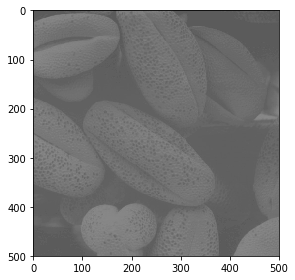

In [5]:
# Loading image in the original color format: 
# For this, have to set the parameter ‘as_gray’ to False:

image_original = imread('\\coffee_beans_image.jpg', as_gray = False)

imshow(image_original);

In [6]:
#image_original

In [7]:
# transforming image to a numpy array 
img_arr = (np.round(np.array(image_original))).astype(np.uint8)

In [8]:
img_arr

array([[ 91,  91,  91, ..., 107, 107, 105],
       [ 91,  91,  91, ..., 106, 106, 104],
       [ 91,  91,  91, ..., 103, 103, 101],
       ...,
       [ 96,  91,  91, ..., 122, 120, 121],
       [ 97,  93,  91, ..., 121, 120, 119],
       [ 98,  96,  91, ..., 120, 121, 118]], dtype=uint8)

In [9]:
np.min(img_arr)

90

In [10]:
np.max(img_arr)

138

In [11]:
# Even with 256 possible values to take, most pixels here are in between 90 and 138.

In [12]:
# Preparing for data manipulation by flattening
img_arr = img_arr.flatten()

In [13]:
img_arr

array([ 91,  91,  91, ..., 120, 121, 118], dtype=uint8)

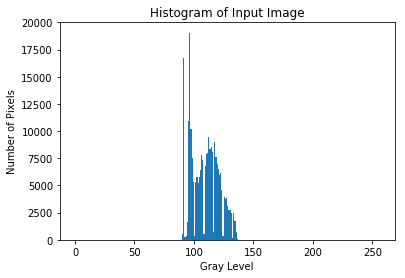

In [14]:
# Counting intensity values and plotting it to get histogram

plt.hist(img_arr, bins = 256, range = [0,256])
plt.title("Histogram of Input Image")
plt.xlabel("Gray Level")
plt.ylabel("Number of Pixels")
plt.show()

In [15]:
# As we can see here, the image has a narrow histogram
# with values centered towards middle of gray scale
# resulting in an image with bad contrast 

In [16]:
# If we distribute the histogram to a wider range, quality of image will usually improve.
# We can do that by adjusting the PDF of histogram so that
# probability is spread equally.

In [17]:
img_hist, bins = np.histogram(img_arr,bins=256)

In [18]:
img_hist

array([  516,     0,     0,     0,     0, 16706,     0,     0,     0,
           0,   287,     0,     0,     0,     0,     0,   324,     0,
           0,     0,     0,  1638,     0,     0,     0,     0, 10932,
           0,     0,     0,     0,     0, 19057,     0,     0,     0,
           0, 10206,     0,     0,     0,     0,  7516,     0,     0,
           0,     0,     0,  5330,     0,     0,     0,     0,   390,
           0,     0,     0,     0,  5339,     0,     0,     0,     0,
           0,  5813,     0,     0,     0,     0,  5200,     0,     0,
           0,     0,  5735,     0,     0,     0,     0,     0,  6410,
           0,     0,     0,     0,  7843,     0,     0,     0,     0,
        7320,     0,     0,     0,     0,     0,   545,     0,     0,
           0,     0,  6776,     0,     0,     0,     0,  7919,     0,
           0,     0,     0,     0,  8017,     0,     0,     0,     0,
        9462,     0,     0,     0,     0,  8397,     0,     0,     0,
           0,     0,

In [19]:
# Using cumulative distribution function (CDF) for the mapping of pixel values
# CDF is the image's accumulated normalized histogram
# Finding cumulative sum of the array
# Non-normalized CDF
cdf = img_hist.cumsum()

In [20]:
cdf

array([   516,    516,    516,    516,    516,  17222,  17222,  17222,
        17222,  17222,  17509,  17509,  17509,  17509,  17509,  17509,
        17833,  17833,  17833,  17833,  17833,  19471,  19471,  19471,
        19471,  19471,  30403,  30403,  30403,  30403,  30403,  30403,
        49460,  49460,  49460,  49460,  49460,  59666,  59666,  59666,
        59666,  59666,  67182,  67182,  67182,  67182,  67182,  67182,
        72512,  72512,  72512,  72512,  72512,  72902,  72902,  72902,
        72902,  72902,  78241,  78241,  78241,  78241,  78241,  78241,
        84054,  84054,  84054,  84054,  84054,  89254,  89254,  89254,
        89254,  89254,  94989,  94989,  94989,  94989,  94989,  94989,
       101399, 101399, 101399, 101399, 101399, 109242, 109242, 109242,
       109242, 109242, 116562, 116562, 116562, 116562, 116562, 116562,
       117107, 117107, 117107, 117107, 117107, 123883, 123883, 123883,
       123883, 123883, 131802, 131802, 131802, 131802, 131802, 131802,
      

In [21]:
# Normalized CDF
cdf = 255 * (cdf / cdf[-1])

In [22]:
cdf

array([  0.52632,   0.52632,   0.52632,   0.52632,   0.52632,  17.56644,
        17.56644,  17.56644,  17.56644,  17.56644,  17.85918,  17.85918,
        17.85918,  17.85918,  17.85918,  17.85918,  18.18966,  18.18966,
        18.18966,  18.18966,  18.18966,  19.86042,  19.86042,  19.86042,
        19.86042,  19.86042,  31.01106,  31.01106,  31.01106,  31.01106,
        31.01106,  31.01106,  50.4492 ,  50.4492 ,  50.4492 ,  50.4492 ,
        50.4492 ,  60.85932,  60.85932,  60.85932,  60.85932,  60.85932,
        68.52564,  68.52564,  68.52564,  68.52564,  68.52564,  68.52564,
        73.96224,  73.96224,  73.96224,  73.96224,  73.96224,  74.36004,
        74.36004,  74.36004,  74.36004,  74.36004,  79.80582,  79.80582,
        79.80582,  79.80582,  79.80582,  79.80582,  85.73508,  85.73508,
        85.73508,  85.73508,  85.73508,  91.03908,  91.03908,  91.03908,
        91.03908,  91.03908,  96.88878,  96.88878,  96.88878,  96.88878,
        96.88878,  96.88878, 103.42698, 103.42698, 

In [23]:
# Rounding up values in array
cdf = np.rint(cdf).astype(np.uint8)

In [24]:
cdf

array([  1,   1,   1,   1,   1,  18,  18,  18,  18,  18,  18,  18,  18,
        18,  18,  18,  18,  18,  18,  18,  18,  20,  20,  20,  20,  20,
        31,  31,  31,  31,  31,  31,  50,  50,  50,  50,  50,  61,  61,
        61,  61,  61,  69,  69,  69,  69,  69,  69,  74,  74,  74,  74,
        74,  74,  74,  74,  74,  74,  80,  80,  80,  80,  80,  80,  86,
        86,  86,  86,  86,  91,  91,  91,  91,  91,  97,  97,  97,  97,
        97,  97, 103, 103, 103, 103, 103, 111, 111, 111, 111, 111, 119,
       119, 119, 119, 119, 119, 119, 119, 119, 119, 119, 126, 126, 126,
       126, 126, 134, 134, 134, 134, 134, 134, 143, 143, 143, 143, 143,
       152, 152, 152, 152, 152, 161, 161, 161, 161, 161, 161, 170, 170,
       170, 170, 170, 178, 178, 178, 178, 178, 179, 179, 179, 179, 179,
       179, 188, 188, 188, 188, 188, 196, 196, 196, 196, 196, 203, 203,
       203, 203, 203, 203, 209, 209, 209, 209, 209, 215, 215, 215, 215,
       215, 222, 222, 222, 222, 222, 222, 226, 226, 226, 226, 22

In [25]:
# Using linear interpolation of CDF
# for finding the new pixel values:
img_eq = np.interp(img_arr.flatten(),bins[:-1],cdf)

In [26]:
img_eq

array([ 18.,  18.,  18., ..., 209., 215., 196.])

In [27]:
image_original.shape

(500, 500)

In [28]:
# Reshaping the equalized image to have same image dimensions
img_eq = img_eq.reshape(image_original.shape)

In [29]:
img_eq

array([[ 18.,  18.,  18., ..., 119., 119., 103.],
       [ 18.,  18.,  18., ..., 111., 111.,  97.],
       [ 18.,  18.,  18., ...,  91.,  91.,  80.],
       ...,
       [ 50.,  18.,  18., ..., 222., 209., 215.],
       [ 61.,  18.,  18., ..., 215., 209., 203.],
       [ 69.,  50.,  18., ..., 209., 215., 196.]])

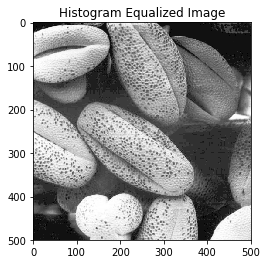

In [30]:
plt.figure(figsize=(4,4))
plt.title('Histogram Equalized Image')
plt.imshow(img_eq, cmap = "gray");

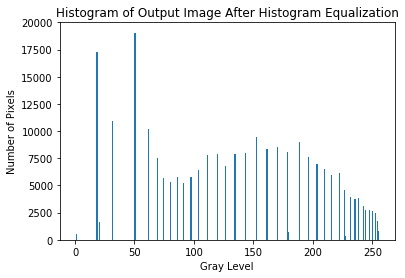

In [31]:
# Getting the numpy array again for the equalized image
img_eq_arr = np.array(img_eq)

# Flattening
img_eq_arr = img_eq_arr.flatten()

# Plotting histogram of the equalized
plt.hist(img_eq_arr, bins = 256, range = [0,256])
plt.title("Histogram of Output Image After Histogram Equalization")
plt.xlabel("Gray Level")
plt.ylabel("Number of Pixels")
plt.show()

In [32]:
# So, now in the histogram of the output image,
# the contrast has been enhanced and its histogram has also been equalized.
# the contrast has stretched on both sides over the whole dynamic range
# creating an image with higher, better contrast than before.
# So using Histogram Equalization, we have stretched the contrast

In [33]:
np.min(img_eq_arr)

1.0

In [34]:
np.max(img_eq_arr)

255.0

In [35]:
# Now due to pixel intensities ranging from 1 to 255, 
# We are now able to distinguish more features as their contrast is greater.

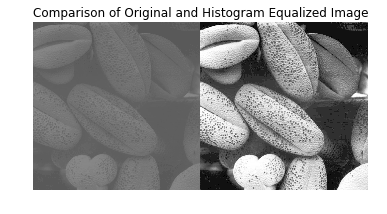

In [36]:
result = np.hstack((image_original,img_eq))
plt.title("Comparison of Original and Histogram Equalized Image")
plt.axis('off')
plt.imshow(result, cmap = "gray");

In [37]:
def my_histogram_equalizer(image):
    img_hist, bins = np.histogram(image,bins=256)
    
    # non-normalized cdf
    cdf = img_hist.cumsum()
    
    # normalized cdf
    cdf = 255 * (cdf / cdf[-1])
    
    # rounding up values
    cdf = np.rint(cdf).astype(np.uint8)
    
    # using linear interpolation of cdf values to find new pixel values
    img_eq = np.interp(img_arr.flatten(),bins[:-1],cdf)
    
    # reshaping for same data dimension
    img_eq = img_eq.reshape(image.shape)
    
    return img_eq

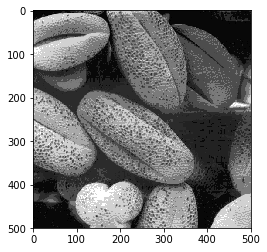

In [38]:
# Applying H.E. again on the first equalized output
img_eq2 = my_histogram_equalizer(img_eq)
plt.figure(figsize=(4,4))
plt.imshow(img_eq2, cmap = "gray");

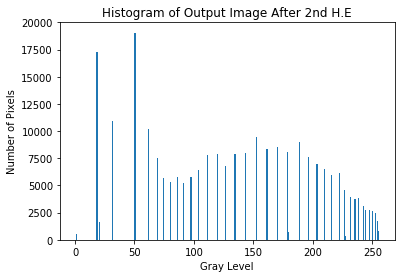

In [39]:
# Histogram after H.E application on the first H.E output
img_eq_arr2 = np.array(img_eq2)
img_eq_arr2 = img_eq_arr.flatten()
plt.hist(img_eq_arr2, bins = 256, range = [0,256])
plt.title("Histogram of Output Image After 2nd H.E")
plt.xlabel("Gray Level")
plt.ylabel("Number of Pixels")
plt.show()

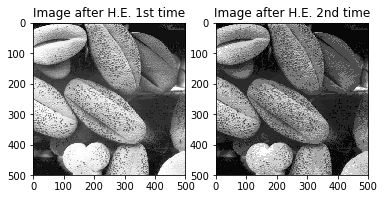

In [40]:
plt.subplot(121)
plt.imshow(img_eq)
plt.title('Image after H.E. 1st time')
plt.set_cmap('gray')

plt.subplot(122)
plt.imshow(img_eq2)
plt.title('Image after H.E. 2nd time')
plt.set_cmap('gray')
plt.show()

In [41]:
# As we can see here, the input image (which is the output image of original image after H.E.)
# already has a good contrast and is already covering the whole dynamic range,
# so there was no room for the values to stretch much
# creating an almost similar output image.

In [42]:
# Histogram equalization performs well when the histogram of image is confined within a narrow dynamic region. 
# It does not seem to perform well when there are large intensity variations with the histogram
# covering almost the whole dynamic region (like having both pixels on both bright and dark ends)